In [37]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import calendar
import ast

# loading data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

#Data cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

df['job_skills'] = df['job_skills'].apply(
    lambda x: ast.literal_eval(x) if isinstance(x, str) and pd.notna(x) else (x if isinstance(x, list) else [])
)

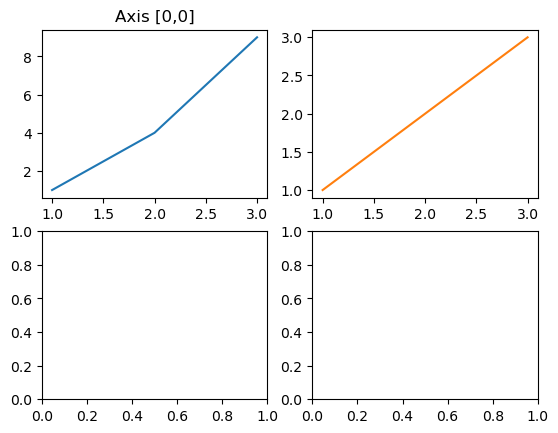

In [38]:
# here we are going to learn about the subplots: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html
# create a sample subplot
fig, ax = plt.subplots(2, 2) # 2 rows and 2 columns
ax[0, 0].plot([1, 2, 3], [1, 4, 9], 'tab:blue')
ax[0, 0].set_title('Axis [0,0]')
ax[0, 1].plot([1, 2, 3], [1, 2, 3], 'tab:orange')   

<Axes: ylabel='job_title_short'>

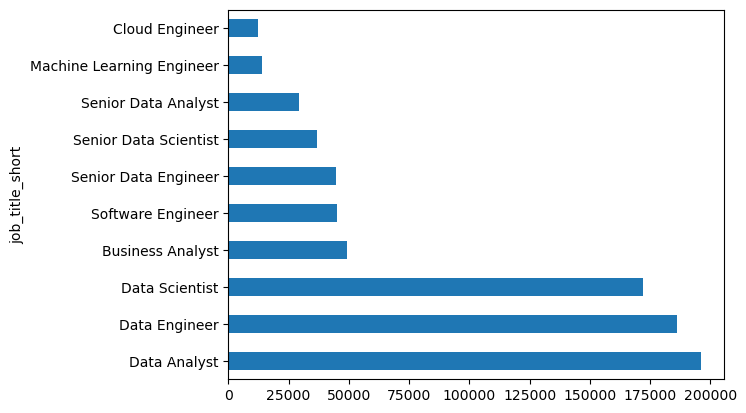

In [39]:
fig, ax = plt.subplots()

# preparing the data for plotting
df['job_title_short'].value_counts().plot(kind='barh', ax=ax)

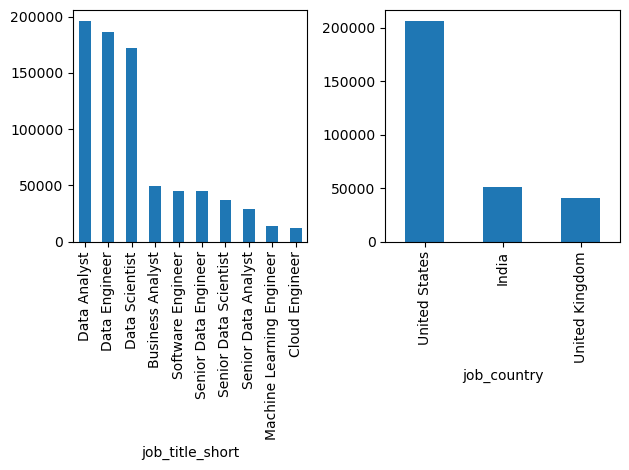

In [40]:
# lets add two plots
fig, ax = plt.subplots(1, 2)
df['job_title_short'].value_counts().plot(kind='bar', ax=ax[0])
df['job_country'].value_counts().head(3).plot(kind='bar', ax=ax[1])

fig.tight_layout()

plt.show()


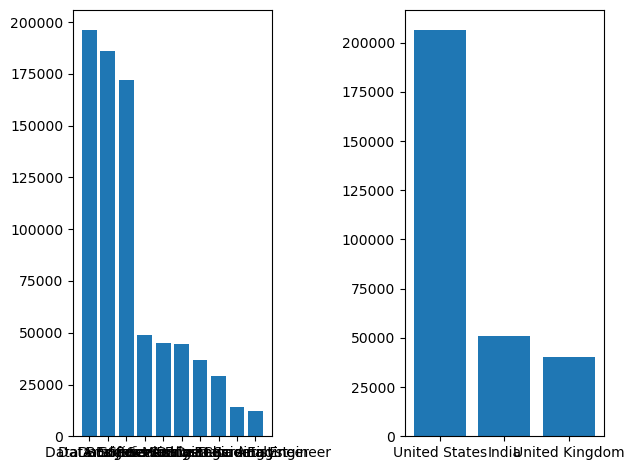

In [41]:
# alteranatively we can plot how matplotlib intended but we prefer the above one
fig, ax = plt.subplots(1, 2)
ax[0].bar(df['job_title_short'].value_counts().index, df['job_title_short'].value_counts().values)
ax[1].bar(df['job_country'].value_counts().head(3).index, df['job_country'].value_counts().head(3).values)  
fig.tight_layout()
plt.show()

In [42]:
# Create a subplot that displays individual bar charts for each job_title_short from the DataFrame we created in 11_Pandas_Explode
df_skills = df.copy()
df_skills = df_skills.explode('job_skills')
skills_counts = df_skills.groupby(['job_title_short', 'job_skills']).size().reset_index(name='skill_count')
df_skills_counts = skills_counts.sort_values(['skill_count'], ascending= False)
df_skills_counts

,job_title_short,job_skills,skill_count
1066,Data Scientist,python,113711
865,Data Engineer,sql,113130
830,Data Engineer,python,108022
625,Data Analyst,sql,92428
1101,Data Scientist,sql,78982
...,...,...,...
266,Cloud Engineer,delphi,1
1920,Senior Data Scientist,objective-c,1
1400,Senior Data Analyst,couchdb,1
298,Cloud Engineer,haskell,1


In [43]:
# get the top 3 job titles
job_titles = df_skills_counts['job_title_short'].unique().tolist()[:3]
job_titles


['Data Scientist', 'Data Engineer', 'Data Analyst']

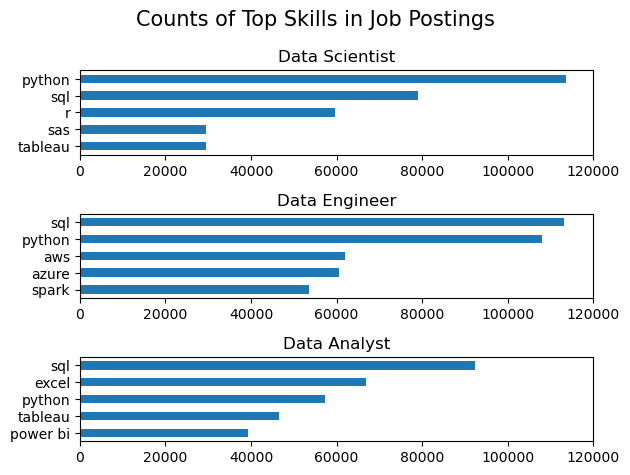

In [46]:
fig, ax = plt.subplots(len(job_titles), 1)

for i, job_title in enumerate(job_titles):
    df_plot = df_skills_counts[df_skills_counts['job_title_short'] == job_title].head(5)
    df_plot.plot(kind='barh', x='job_skills', y='skill_count', ax=ax[i], title=job_title)
    ax[i].invert_yaxis()
    ax[i].set_ylabel('')
    ax[i].legend().set_visible(False)
    ax[i].set_xlim(0,120000)
fig.suptitle('Counts of Top Skills in Job Postings', fontsize=15)
fig.tight_layout()
plt.show()
